# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [178]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [179]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [183]:
units = 'imperial'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q='

name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []
record=0

print(f'Beginning Data Retrevial')
print(f'------------------------')
    
for city in cities:
    response = requests.get(url+city).json()
#     pprint(response)
   
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record = record+1
        city_record = response['name']
        print(f'Prossessing Record {record} of {len(cities)} | {city_record}')
        
    except:
        print('City not found. Skipping...')
        pass

print(f'------------------------')
print(f'Data Retreival Complete')

Beginning Data Retrevial
------------------------
Prossessing Record 1 of 593 | Hilo
Prossessing Record 2 of 593 | Mayo
Prossessing Record 3 of 593 | Hermanus
Prossessing Record 4 of 593 | Atbasar
Prossessing Record 5 of 593 | Puerto Ayora
Prossessing Record 6 of 593 | Liverpool
Prossessing Record 7 of 593 | Port Blair
Prossessing Record 8 of 593 | Upernavik
Prossessing Record 9 of 593 | Lebu
Prossessing Record 10 of 593 | Albany
Prossessing Record 11 of 593 | Olafsvik
Prossessing Record 12 of 593 | Kysyl-Syr
Prossessing Record 13 of 593 | Nyrob
Prossessing Record 14 of 593 | Mama
Prossessing Record 15 of 593 | East London
Prossessing Record 16 of 593 | Chui
Prossessing Record 17 of 593 | Belmonte
Prossessing Record 18 of 593 | Khatanga
Prossessing Record 19 of 593 | Hobart
Prossessing Record 20 of 593 | Nanortalik
Prossessing Record 21 of 593 | Busselton
Prossessing Record 22 of 593 | São Filipe
City not found. Skipping...
City not found. Skipping...
Prossessing Record 23 of 593 | Bat

Prossessing Record 189 of 593 | Hampton
Prossessing Record 190 of 593 | Richards Bay
City not found. Skipping...
Prossessing Record 191 of 593 | Tikrit
Prossessing Record 192 of 593 | San Miguel
Prossessing Record 193 of 593 | Quartucciu
Prossessing Record 194 of 593 | Ferkessédougou
Prossessing Record 195 of 593 | Zhangye
Prossessing Record 196 of 593 | Ahipara
Prossessing Record 197 of 593 | Chimichagua
Prossessing Record 198 of 593 | Le Vauclin
Prossessing Record 199 of 593 | Yarmouth
Prossessing Record 200 of 593 | Zhigansk
Prossessing Record 201 of 593 | Salalah
Prossessing Record 202 of 593 | Vanavara
Prossessing Record 203 of 593 | Labuan
Prossessing Record 204 of 593 | Puerto Nariño
Prossessing Record 205 of 593 | Lompoc
Prossessing Record 206 of 593 | Bethel
Prossessing Record 207 of 593 | La Asuncion
Prossessing Record 208 of 593 | Teluk Nibung
Prossessing Record 209 of 593 | Vilhena
Prossessing Record 210 of 593 | Nuuk
Prossessing Record 211 of 593 | Dunedin
Prossessing Reco

Prossessing Record 379 of 593 | Mago
Prossessing Record 380 of 593 | Hamilton
Prossessing Record 381 of 593 | Coquimbo
Prossessing Record 382 of 593 | Sennar
Prossessing Record 383 of 593 | Klaksvík
Prossessing Record 384 of 593 | Luwuk
Prossessing Record 385 of 593 | Obo
Prossessing Record 386 of 593 | Senneterre
Prossessing Record 387 of 593 | Warrnambool
Prossessing Record 388 of 593 | Montepuez
City not found. Skipping...
Prossessing Record 389 of 593 | Levelland
Prossessing Record 390 of 593 | Ukiah
Prossessing Record 391 of 593 | Clarence Town
Prossessing Record 392 of 593 | Raudeberg
Prossessing Record 393 of 593 | Guilin
Prossessing Record 394 of 593 | Bengkulu
Prossessing Record 395 of 593 | Hualmay
Prossessing Record 396 of 593 | Aranda de Duero
Prossessing Record 397 of 593 | Linxia Chengguanzhen
City not found. Skipping...
Prossessing Record 398 of 593 | San Cristobal
Prossessing Record 399 of 593 | Myre
Prossessing Record 400 of 593 | Sovetskiy
Prossessing Record 401 of 59

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [186]:
weather_df = pd.DataFrame({
    'City' : name,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : max_temp,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date': date
})
weather_df.to_csv(r'../output_data/cities.csv', index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.40,73,75,6.91,US,1611515822
1,Mayo,38.8876,-76.5119,37.99,41,40,5.75,US,1611515962
2,Hermanus,-34.4187,19.2345,64.99,70,24,5.99,ZA,1611515838
3,Atbasar,51.8000,68.3333,-2.47,92,100,9.37,KZ,1611515962
4,Puerto Ayora,-0.7393,-90.3518,84.20,70,40,16.11,EC,1611515837


In [185]:
stats = weather_df.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.542725,19.634011,49.603247,72.330258,56.164207,7.937878,1.611516e+09
std,33.569558,92.284928,34.767667,20.200743,40.143053,5.469529,1.100817e+02
min,-54.800000,-179.166700,-55.500000,10.000000,0.000000,0.560000,1.611515e+09
25%,-8.452800,-64.386600,30.167500,62.000000,10.000000,3.510000,1.611516e+09
50%,21.759950,24.699050,63.500000,78.000000,75.000000,6.670000,1.611516e+09
75%,48.335900,102.444925,77.845000,87.000000,98.000000,11.135000,1.611516e+09
max,78.218600,179.316700,106.160000,100.000000,100.000000,29.930000,1.611516e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [187]:
humidity = weather_df.loc[weather_df['Humidity']>=100]
humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
81,Airai,-8.9266,125.4092,60.76,100,89,1.99,TL,1611516102
91,Vaini,-21.2000,-175.2000,75.20,100,75,4.61,TO,1611516103
122,Maun,-19.9833,23.4167,78.80,100,0,2.30,BW,1611516108
126,Mahuta,-10.8667,39.4500,69.46,100,98,3.09,TZ,1611516108
291,Port Hardy,50.6996,-127.4199,35.60,100,90,5.75,CA,1611516117


In [217]:
#  Get the indices of cities that have humidity over 100%.
h_index=list(np.where(weather_df['Humidity']>=100))
print(h_index)

[array([ 81,  91, 122, 126, 291, 323, 334, 375, 410, 436, 444, 466, 475],
      dtype=int64)]


In [242]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_data = weather_df.drop(weather_df.index[h_index], axis=0, inplace=False)
city_data

C:\Users\krist\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexes\base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,73.40,73,75,6.91,US,1611515822
1,Mayo,38.8876,-76.5119,37.99,41,40,5.75,US,1611515962
2,Hermanus,-34.4187,19.2345,64.99,70,24,5.99,ZA,1611515838
3,Atbasar,51.8000,68.3333,-2.47,92,100,9.37,KZ,1611515962
4,Puerto Ayora,-0.7393,-90.3518,84.20,70,40,16.11,EC,1611515837
...,...,...,...,...,...,...,...,...,...
537,Nishifukuma,33.7667,130.4667,44.01,81,5,5.75,JP,1611516163
538,Kirovskiy,45.0917,133.5136,0.52,92,0,2.37,RU,1611516163
539,Tyumentsevo,53.3224,81.4980,-39.96,81,25,6.08,RU,1611516163
540,Mnogovershinnyy,53.9353,139.9242,-30.86,81,0,5.59,RU,1611516163


In [190]:
len(city_data)

529

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

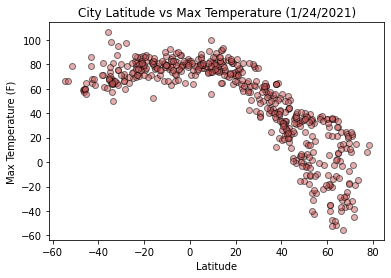

In [241]:
x=city_data['Lat']
y=city_data['Max Temp']

plt.scatter(x, y, facecolor = 'indianred', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Max Temperature (1/24/2021)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_max_temp.png')

plt.show()

**City Latitude vs Max Temperature Observations**

The data shown in this graph seem to show a relationship between the latitude of a city and the max temperature. The data seems to indicate that as 

## Latitude vs. Humidity Plot

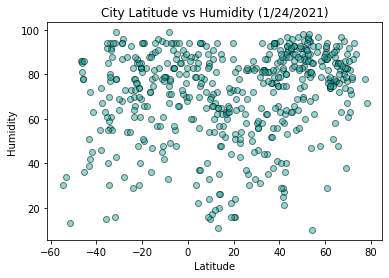

In [192]:
x=city_data['Lat']
y=city_data['Humidity']

plt.scatter(x, y, facecolor = 'lightseagreen', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Humidity (1/24/2021)')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_humidity.png')

plt.show()

**City Latitude vs Humidity Observations**

The data represented in the graph does not seem to have any patterns. Based on the data shown, we cannot use the latitude of a city as a predictor of the humidity level. This can be supported by the way the data seems fairly evenly distributed across the entire graph.

## Latitude vs. Cloudiness Plot

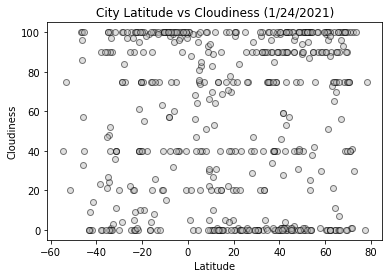

In [193]:
x=city_data['Lat']
y=city_data['Cloudiness']

plt.scatter(x, y, facecolor = 'silver', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Cloudiness (1/24/2021)')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_cloud.png')

plt.show()

**City Latitude vs Cloudiness Observations**

Based on the data it doesn't seem that you can predict the level of cloudiness based on the latitude of a city. However, there are clusters of data on 100%, 90%, 75%, 40%, 20%, and 0%. This may suggest that areas tend to use measurements with either five or zero on the end more frequently than others when describing the level of cloudiness. It would be interesting to look at reporting standards to see if there were similarities between the cities that are clustered around the values 100%, 90%, 75%, 40%, 20%, and 0%.

## Latitude vs. Wind Speed Plot

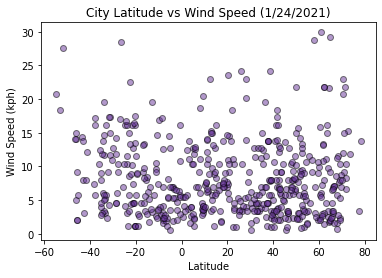

In [194]:
x=city_data['Lat']
y=city_data['Wind Speed']

plt.scatter(x, y, facecolor = 'rebeccapurple', alpha = .5, edgecolor='k')
plt.title('City Latitude vs Wind Speed (1/24/2021)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('../output_data/lat_wind.png')

plt.show()

**City Latitude vs Wind Speed Observations**

There does not seem to be a correlation between latitude and wind speed. The data is clustered fairly evenly across the latitudes and different wind speeds. One observation that may be inferred is that the majority of wind speeds tend to be below 20 mph. 

## Linear Regression

In [232]:
n_hemi = city_data.loc[(city_data['Lat'] >= 0) & (city_data['Lat'] <= 90)]
len(n_hemi)

361

In [233]:
s_hemi = city_data.loc[(city_data['Lat'] >= -90) & (city_data['Lat'] < 0)]
len(s_hemi)

168

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7404139181330447


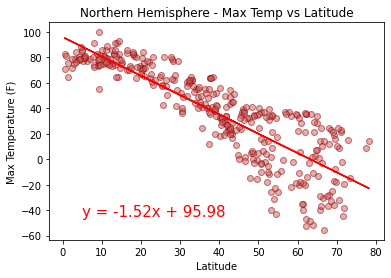

In [234]:
x_values = n_hemi['Lat']
y_values = n_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'indianred', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (5,-45), fontsize=15, color="red")

plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_max.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.19466874864404804


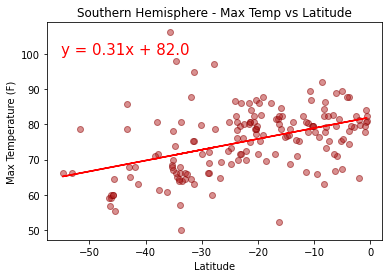

In [235]:
x_values = s_hemi['Lat']
y_values = s_hemi['Max Temp']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'firebrick', 
            alpha = .5, edgecolor='darkred')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 100), fontsize=15, color="red")

plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_max.png')

plt.show()

**Northern and Southern Hemisphere comparison of Max Temp vs Latitude Observations**

When comparing these two graphs, there seems to be a much stronger correlation between temperature and latitude in the northern hemisphere. However, the data points are not evenly split between northern and southern hemispheres. This may be causing some skew in the data. Both graphs seem to show that temperatures tend to rise as one moves closer to 0 degrees latitude. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11398817960168382


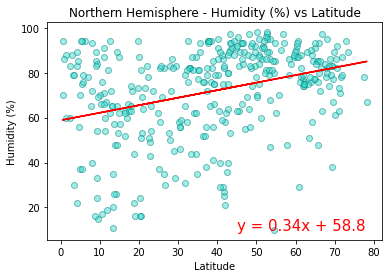

In [236]:
x_values = n_hemi['Lat']
y_values = n_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'turquoise', 
            alpha = .5, edgecolor='teal')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (45,10), fontsize=15, color="red")

plt.title('Northern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_humidity.png')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07332369712238933


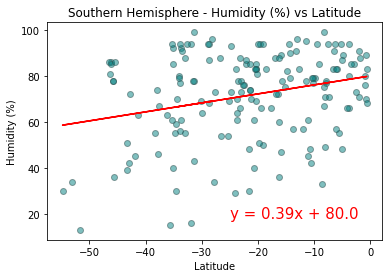

In [237]:
x_values = s_hemi['Lat']
y_values = s_hemi['Humidity']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'teal', 
            alpha = .5, edgecolor='darkslategrey')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-25, 18), fontsize=15, color="red")

plt.title('Southern Hemisphere - Humidity (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_humidity.png')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028285964971340255


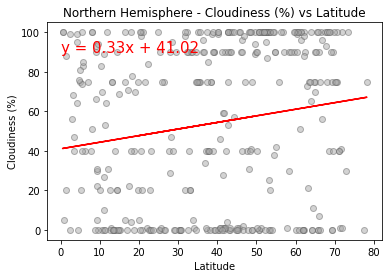

In [238]:
x_values = n_hemi['Lat']
y_values = n_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'darkgray', 
            alpha = .5, edgecolor='dimgray')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,90), fontsize=15, color="red")

plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_cloud.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10021184332881426


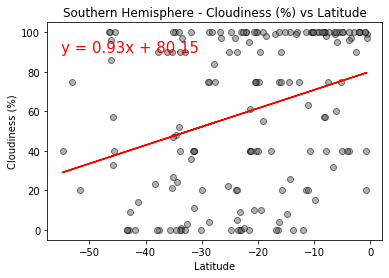

In [202]:
x_values = s_hemi['Lat']
y_values = s_hemi['Cloudiness']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'dimgray', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-55, 90), fontsize=15, color="red")

plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_cloud.png')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0012170693033701876


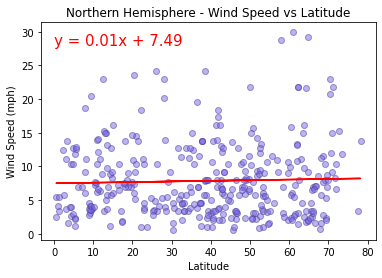

In [239]:
x_values = n_hemi['Lat']
y_values = n_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'mediumslateblue', 
            alpha = .5, edgecolor='darkslateblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (0,28), fontsize=15, color="red")

plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/nh_lat_wind.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10756795916134505


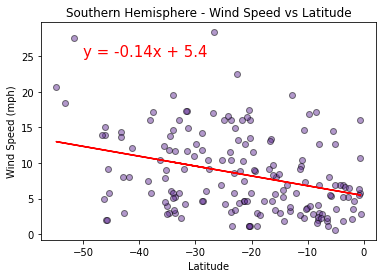

In [240]:
x_values = s_hemi['Lat']
y_values = s_hemi['Wind Speed']
t_slope, t_intercept, t_rvalue, t_pvalue, t_stderr = linregress(x_values, y_values)
regress_values = x_values * t_slope + t_intercept

line_eq = "y = " + str(round(t_slope,2)) + "x + " + str(round(t_intercept,2))

plt.scatter(x_values,y_values, facecolor = 'rebeccapurple', 
            alpha = .5, edgecolor='k')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"The r-squared is: {t_rvalue**2}")
plt.savefig('../output_data/sh_lat_wind.png')

plt.show()